# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib


 # Load the dataset

In [2]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance_data = pd.read_csv(url)

print("Dataset Preview:")
print(insurance_data.head())
print("\nDataset Info:")
print(insurance_data.info())
print("\nDataset Statistics:")
print(insurance_data.describe())

# Checking for missing values
print("\nMissing Values:")
print(insurance_data.isnull().sum())

Dataset Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Dataset Statistics:
               age          bmi     ch

# Exploratory Data Analysis

##Visualization

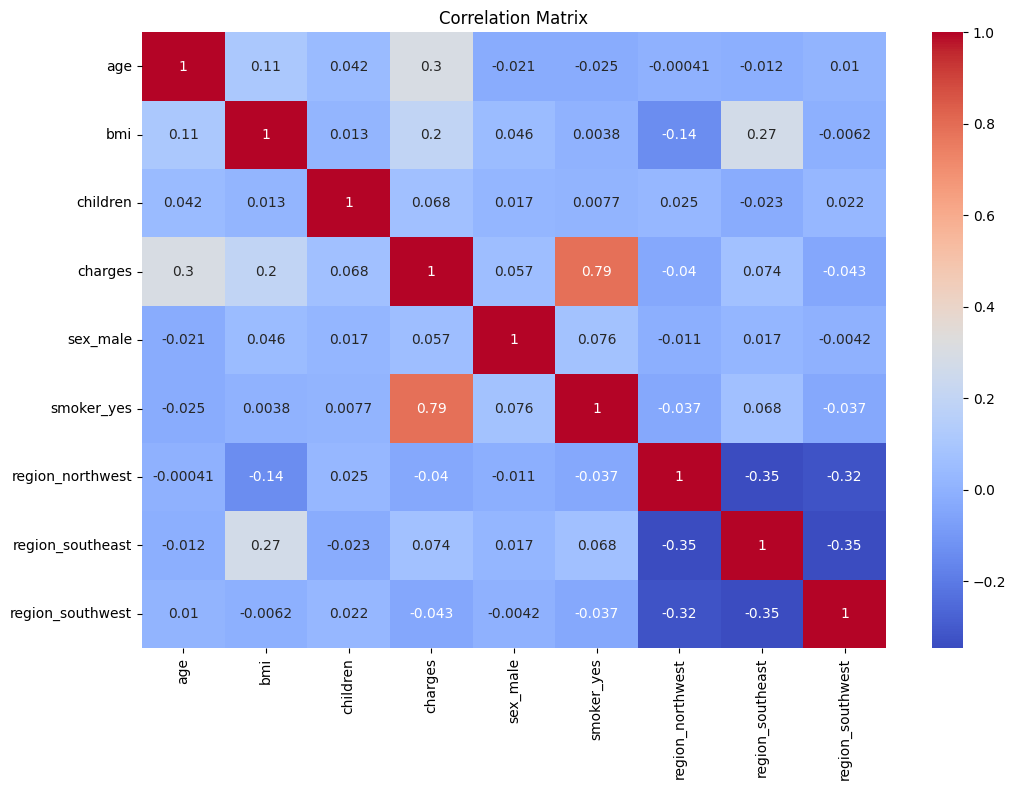

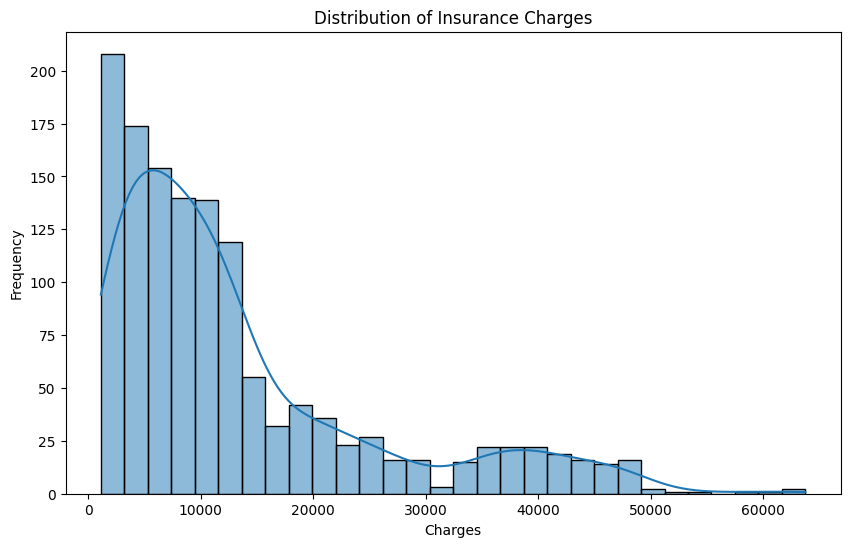

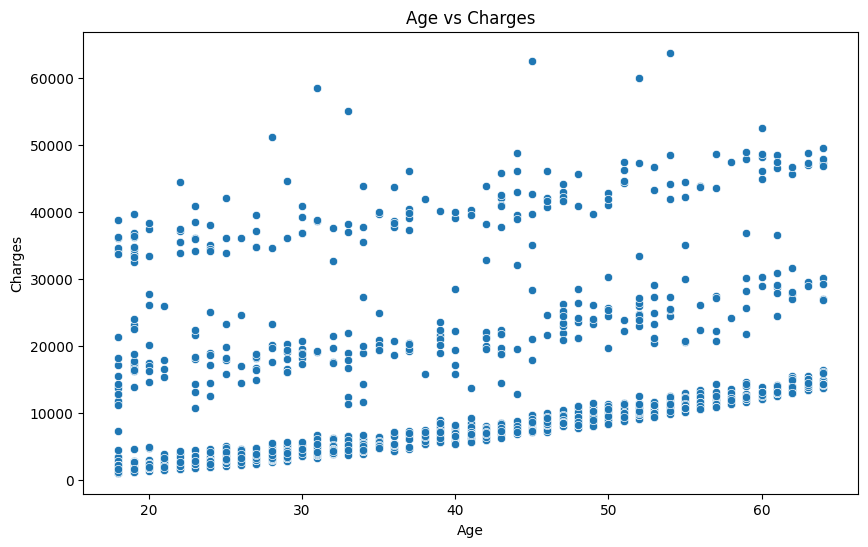

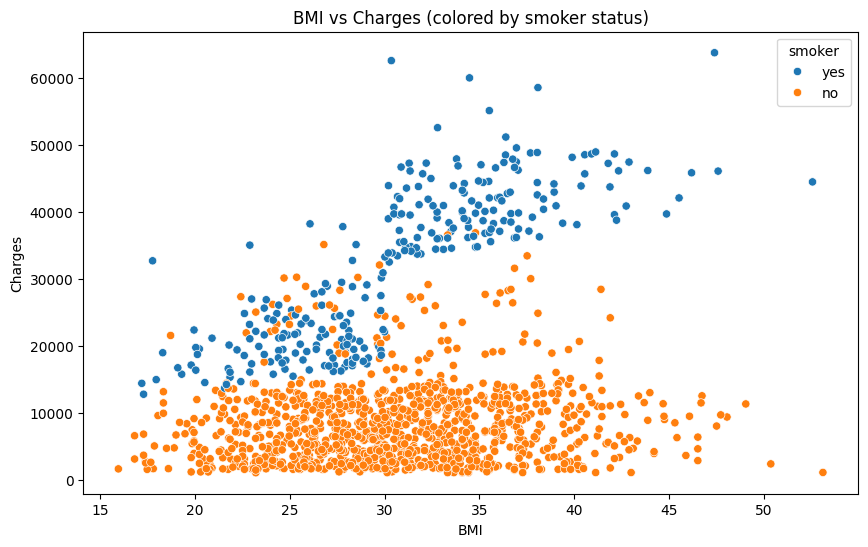

In [3]:
# EDA

numeric_features = insurance_data.select_dtypes(include=np.number)
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

plt.figure(figsize=(12, 8))

# Use insurance_data_encoded instead of insurance_data
sns.heatmap(insurance_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Relationship between age and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_data)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Relationship between BMI and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data, hue='smoker')
plt.title('BMI vs Charges (colored by smoker status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


# Prepare data for modeling

In [4]:
# Convert categorical variables to numerical
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

# Split features and target
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Implement Linear Regression with Gradient Descent

In [6]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iterations):
            # Linear model
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost
            cost = (1/(2*n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)

            # Print cost every 100 iterations
            if (i+1) % 100 == 0:
                print(f'Iteration {i+1}: Cost = {cost}')

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Train the custom linear regression model

In [7]:
# Train the custom linear regression model
lr_gd = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_gd.fit(X_train_scaled, y_train)


Iteration 100: Cost = 38405217.18232686
Iteration 200: Cost = 21391198.493472695
Iteration 300: Cost = 19033344.25095237
Iteration 400: Cost = 18698931.223487582
Iteration 500: Cost = 18649536.545604255
Iteration 600: Cost = 18641462.78655025
Iteration 700: Cost = 18639783.114746265
Iteration 800: Cost = 18639272.163314264
Iteration 900: Cost = 18639058.131661803
Iteration 1000: Cost = 18638953.689638946



# Plot the cost history

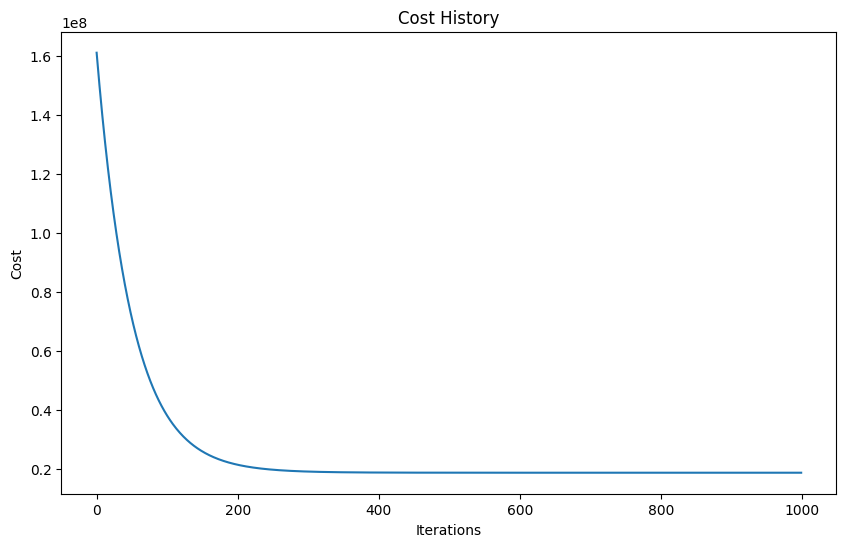

In [8]:
# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(lr_gd.cost_history)
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Make predictions and  Evaluate the model

In [9]:
# Make predictions
y_pred_gd = lr_gd.predict(X_test_scaled)

# Evaluate the model
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Custom Linear Regression with Gradient Descent:")
print(f"Mean Squared Error: {mse_gd}")
print(f"R² Score: {r2_gd}")


Custom Linear Regression with Gradient Descent:
Mean Squared Error: 33608763.19068821
R² Score: 0.783516664724123


# Compare with scikit-learn's Linear Regression

In [10]:
# Compare with scikit-learn's Linear Regression
lr_sk = LinearRegression()
lr_sk.fit(X_train_scaled, y_train)
y_pred_sk = lr_sk.predict(X_test_scaled)

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print(f"\nScikit-learn Linear Regression:")
print(f"Mean Squared Error: {mse_sk}")
print(f"R² Score: {r2_sk}")


Scikit-learn Linear Regression:
Mean Squared Error: 33596915.851361476
R² Score: 0.7835929767120722


# Train Decision Tree Regressor


In [11]:
# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Regressor:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R² Score: {r2_dt}")


Decision Tree Regressor:
Mean Squared Error: 40795333.45408598
R² Score: 0.7372259788399772


# Train Random Forest Regressor

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Regressor:
Mean Squared Error: 20864569.513376206
R² Score: 0.8656055394920775


# Compare models

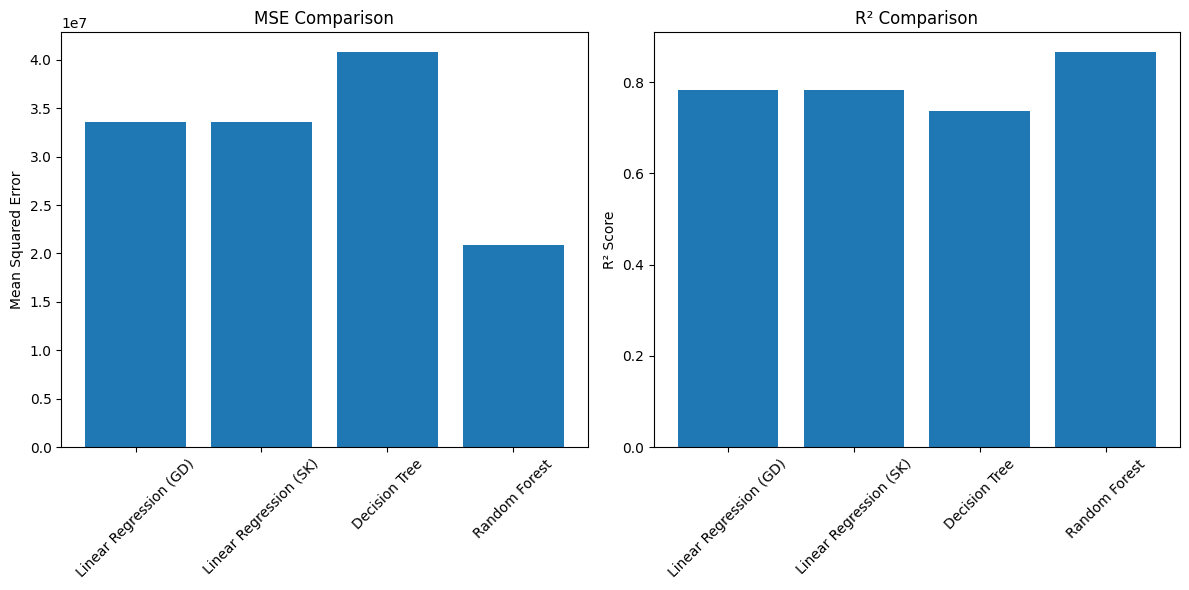

In [13]:
# Compare models
models = ['Linear Regression (GD)', 'Linear Regression (SK)', 'Decision Tree', 'Random Forest']
mse_scores = [mse_gd, mse_sk, mse_dt, mse_rf]
r2_scores = [r2_gd, r2_sk, r2_dt, r2_rf]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores)
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Save the best model based on R² score

In [14]:
# Save the best model based on R² score
best_model_index = r2_scores.index(max(r2_scores))
best_model_name = models[best_model_index]
print(f"\nBest model: {best_model_name} with R² score of {max(r2_scores)}")

if best_model_name == 'Linear Regression (GD)':
    # Save custom model parameters
    np.save('lr_gd_weights.npy', lr_gd.weights)
    np.save('lr_gd_bias.npy', lr_gd.bias)
    print("Custom Linear Regression model parameters saved.")
elif best_model_name == 'Linear Regression (SK)':
    joblib.dump(lr_sk, 'best_model.pkl')
    print("Scikit-learn Linear Regression model saved.")
elif best_model_name == 'Decision Tree':
    joblib.dump(dt, 'best_model.pkl')
    print("Decision Tree model saved.")
elif best_model_name == 'Random Forest':
    joblib.dump(rf, 'best_model.pkl')
    print("Random Forest model saved.")


Best model: Random Forest with R² score of 0.8656055394920775
Random Forest model saved.


# Create a prediction function

In [22]:
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    # Create a dataframe with the input values
    data = {
        'age': [age],
        'bmi': [bmi],
        'children': [children]
    }

    # Add dummy variables
    if sex == 'male':
        data['sex_male'] = [1]
    else:
        data['sex_male'] = [0]

    if smoker == 'yes':
        data['smoker_yes'] = [1]
    else:
        data['smoker_yes'] = [0]

    # Region dummies
    data['region_northwest'] = [1 if region == 'northwest' else 0]
    data['region_southeast'] = [1 if region == 'southeast' else 0]
    data['region_southwest'] = [1 if region == 'southwest' else 0]

    # Create dataframe
    df = pd.DataFrame(data)

    # Ensure columns are in the same order as during training
    expected_columns = X.columns.tolist()
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[expected_columns]

    # Scale the features
    scaler = joblib.load('scaler.pkl')
    df_scaled = scaler.transform(df)

    # Load the best model
    if best_model_name == 'Linear Regression (GD)':
        weights = np.load('lr_gd_weights.npy')
        bias = np.load('lr_gd_bias.npy')
        prediction = np.dot(df_scaled, weights) + bias
    else:
        model = joblib.load('best_model.pkl')
        prediction = model.predict(df_scaled)

    return prediction[0]

# Test the prediction function

In [23]:
test_prediction = predict_insurance_cost(
    age=30,
    sex='male',
    bmi=25.0,
    children=1,
    smoker='no',
    region='southwest'
)
print(f"\nTest prediction: ${test_prediction:.2f}")


Test prediction: $6269.71
